In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

In [7]:
input_2d_x_1 = np.array([[random.randint(1,500) for i in range(2)] for j in range(50)], dtype=np.float32)
input_2d_x_2 = np.array([[random.randint(400,900) for i in range(2)] for j in range(50)], dtype=np.float32)
input_2d_x_3 = np.array([[random.randint(800,1300) for i in range(2)] for j in range(50)], dtype=np.float32)
input_2d_x = np.append(np.append(input_2d_x_1,input_2d_x_2, axis=0), input_2d_x_3, axis=0)

In [14]:
def input_fn_2d(input_2d):
    input_t = tf.convert_to_tensor(input_2d, dtype=tf.float32)
    return (input_t, None)


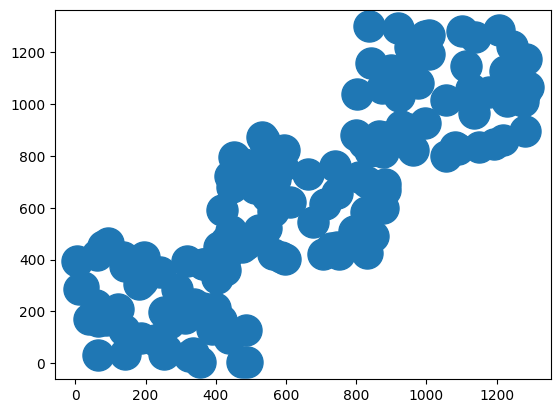

In [15]:
plt.scatter(input_2d_x[:,0], input_2d_x[:,1], s=500)
plt.show()


In [16]:
from tensorflow.contrib.learn.python.learn.estimators import kmeans
from tensorflow.contrib.factorization.python.ops import clustering_ops

In [35]:
k_means_estimator = kmeans.KMeansClustering(num_clusters=3, use_mini_batch=False, relative_tolerance=0.5)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x14c1167d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmpolo78aih'}


In [36]:
fit = k_means_estimator.fit(input_fn=lambda: input_fn_2d(input_2d_x), steps=10000 )

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmpolo78aih/model.ckpt.
INFO:tensorflow:loss = 19412734.0, step = 1
INFO:tensorflow:Saving checkpoints for 2 into /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmpolo78aih/model.ckpt.
INFO:tensorflow:Loss for final step: 10477478.0.


In [37]:
clusters_2d = k_means_estimator.clusters()
clusters_2d

array([[976.88403, 951.98553],
       [375.025  , 519.725  ],
       [362.31708, 195.87805]], dtype=float32)

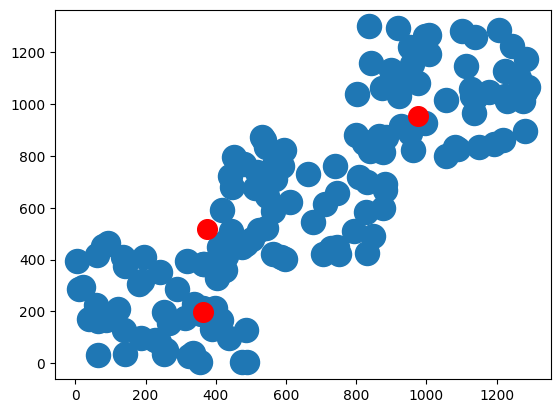

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(input_2d_x[:,0], input_2d_x[:,1], s=300, marker='o')
ax1.scatter(clusters_2d[:,0], clusters_2d[:,1], c='r', s=200, marker='o')

plt.show()


In [39]:
k_means_estimator.get_params()

{'params': {'num_clusters': 3,
  'training_initial_clusters': 'random',
  'distance_metric': 'squared_euclidean',
  'random_seed': 0,
  'use_mini_batch': False,
  'mini_batch_steps_per_iteration': 1,
  'kmeans_plus_plus_num_retries': 2,
  'relative_tolerance': 0.5}}

In [40]:
for name in fit.get_variable_names():
    print(name, fit.get_variable_value(name))

clusters [[976.88403 951.98553]
 [375.025   519.725  ]
 [362.31708 195.87805]]
global_step 2
initialized True


In [41]:
ex_2d_x = np.array([[400,400]], dtype=np.float32)
transform = k_means_estimator.transform(input_fn=lambda: input_fn_2d(ex_2d_x))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmpolo78aih/model.ckpt-2
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [42]:
np.sqrt(transform)

array([[798.4254 , 122.30214, 207.57115]], dtype=float32)

In [43]:
predict = k_means_estimator.predict(input_fn=lambda: input_fn_2d(ex_2d_x), as_iterable=False)



INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/nl/yn0d4tg1107g2jk38nj1hc740000gn/T/tmpolo78aih/model.ckpt-2
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [44]:
predict

{'all_scores': array([[637483.1   ,  14957.8125,  43085.78  ]], dtype=float32),
 'cluster_idx': array([1])}